In [79]:
#Import packages

import numpy as np
from numpy.typing import NDArray
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

#Auxiliary functions

def add_noise_to_feature(X, feature_index=0, noise_level=0.1):
    """
    Add Gaussian noise to a specific feature in the dataset.

    Args:
    - X: Feature matrix (numpy array).
    - feature_index: Index of the feature to add noise to.
    - noise_level: Standard deviation of the noise to add.

    Returns:
    - X_noisy: Feature matrix with noise added to the specified feature.
    """
    X_noisy = X.copy()
    noise = np.random.normal(0, noise_level, size=X_noisy[:, feature_index].shape)
    X_noisy[:, feature_index] += noise
    return X_noisy

def saveSKLModel(fn:str, model) -> None:
    '''save SKLearn model as pickle'''
    with open(fn, 'wb') as f:
        pickle.dump(model, f)

#load dataset

with open("wdt-train.pickle", "rb") as f:
    train_data = pickle.load(f)
X_train = train_data['X']
y_train = train_data['y']
X_train.shape

(11200, 787)

In [58]:
start_index = 0
end_index = 1600
X = X_train[start_index:end_index]
y = y_train[start_index:end_index]

# Train a model (e.g., Random Forest) on fault class 1
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [86]:
model_weights = {0: 1.0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [87]:
from sklearn.metrics import accuracy_score

# Load the test dataset (400 samples per class)
with open("wdt-test-perturbed.pickle", "rb") as f:
    test_data = pickle.load(f)
X_test = test_data['X']
y_test = test_data['y']

# Predict using the trained model
y_pred = model.predict(X_test)

# Overall accuracy
overall_accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Test Accuracy: {overall_accuracy:.4f}")

# Accuracy for each fault class
print("\nAccuracy per Fault Class:")
for fault_class in range(7):  # Assuming 7 fault classes (0–6)
    # Extract samples belonging to the current fault class
    class_indices = np.where(y_test == fault_class)[0]
    y_true_class = y_test[class_indices]
    y_pred_class = y_pred[class_indices]

    # Compute accuracy for the current fault class
    class_accuracy = accuracy_score(y_true_class, y_pred_class)
    print(f"Fault Class {fault_class}: {class_accuracy:.4f}")


Overall Test Accuracy: 0.8571

Accuracy per Fault Class:
Fault Class 0: 0.0000
Fault Class 1: 1.0000
Fault Class 2: 1.0000
Fault Class 3: 1.0000
Fault Class 4: 1.0000
Fault Class 5: 1.0000
Fault Class 6: 1.0000


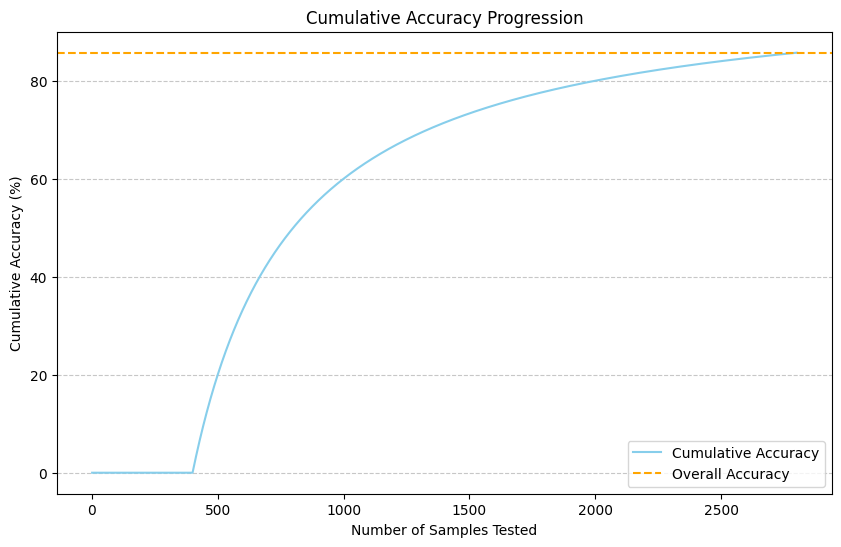

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# Sort the test samples by indices (or randomize for more variability if needed)
indices = np.arange(len(y_test))

# Initialize variables to track cumulative accuracy
cumulative_correct = 0
cumulative_accuracies = []

# Compute cumulative accuracy
for i, index in enumerate(indices):
    # Check if the current prediction is correct
    if y_pred[index] == y_test[index]:
        cumulative_correct += 1

    # Calculate cumulative accuracy
    cumulative_accuracy = (cumulative_correct / (i + 1)) * 100
    cumulative_accuracies.append(cumulative_accuracy)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_accuracies) + 1), cumulative_accuracies, label="Cumulative Accuracy", color="skyblue")
plt.axhline(y=accuracy_score(y_test, y_pred) * 100, color='orange', linestyle='--', label="Overall Accuracy")
plt.xlabel("Number of Samples Tested")
plt.ylabel("Cumulative Accuracy (%)")
plt.title("Cumulative Accuracy Progression")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
